# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
api_key = weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key         
query_url = f"{url}&q="
count = 1
for city in cities: 
    print(f'City number {count}: {city}')
    print(query_url+city)
    count+=1

City number 1: macaboboni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed63b17146d79e3d89d6dcf1166567d7&q=macaboboni
City number 2: mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed63b17146d79e3d89d6dcf1166567d7&q=mataura
City number 3: numata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed63b17146d79e3d89d6dcf1166567d7&q=numata
City number 4: ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed63b17146d79e3d89d6dcf1166567d7&q=ushuaia
City number 5: bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed63b17146d79e3d89d6dcf1166567d7&q=bredasdorp
City number 6: porto novo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed63b17146d79e3d89d6dcf1166567d7&q=porto novo
City number 7: atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed63b17146d79e3d89d6dcf1166567d7&q=atuona
City number 8: santa
http://api.openweathermap.o

In [15]:
### Convert Raw Data to DataFrame
# Export the city data into a .csv.
# Display the DataFrame

city_name=[]
lat = []
long = []
temp = []
hum = []
cloud = []
windsp = []
count = 1

for city in cities:
    response = requests.get(query_url+city).json()
    try:
        lat.append(response['coord']['lat'])
    except:
        continue
    city_name.append(response['name'])
    temp.append(response['main']['temp'])
    hum.append(response['main']['humidity'])
    cloud.append(response['clouds']['all'])
    windsp.append(response['wind']['speed'])
for city in cities:
    response = requests.get(query_url+city).json()
    try:
        long.append(response['coord']['lon'])
    except:
        continue

In [16]:
cities_df = pd.DataFrame({'City': city_name,
                          'Longitude': long,
                          'Latitude': lat,
                          'Temperature': temp,
                          'Humidity': hum,
                          'Cloudiness': cloud,
                          'Wind Speed': windsp
                         })
cities_df

,City,Longitude,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Mataura,168.86,-46.19,50.13,78,100,2.10
1,Numata,139.05,36.63,80.01,84,100,1.99
2,Ushuaia,-68.30,-54.80,37.40,93,75,8.05
3,Bredasdorp,20.04,-34.53,50.00,93,20,3.36
4,Porto-Novo,2.60,6.50,76.82,84,100,6.46
...,...,...,...,...,...,...,...
558,Bagn,9.55,60.82,48.87,85,81,4.00
559,Karratha,116.85,-20.74,87.13,15,0,10.96
560,Miraflores,-98.81,19.22,62.29,63,40,9.17
561,Sulangan,123.72,11.14,85.46,68,100,3.85


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
real_humid = cities_df.loc[cities_df["Humidity"] > 100, :]
print(real_humid)

Empty DataFrame
Columns: [City, Longitude, Latitude, Temperature, Humidity, Cloudiness, Wind Speed]
Index: []


In [18]:
#  Get the indices of cities that have humidity over 100%.


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [20]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
cities_df.to_csv("../output_data/cities2.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

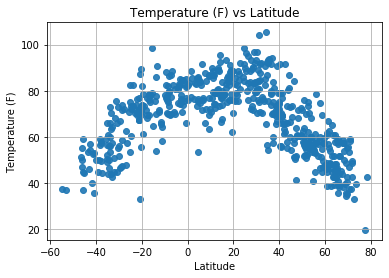

In [21]:
xaxis = cities_df["Latitude"]
tempyaxis = cities_df["Temperature"]
plt.scatter(xaxis, tempyaxis, alpha=0.9)
plt.title("Temperature (F) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)
tempvslatplot = plt.savefig("../Images/LatvsTemp")
plt.show()

In [ ]:
# The above plot shows the movement in temperature in relation to distance from equator. As the Latitude moves further
# from the Equator, the temperature decreases.

## Latitude vs. Humidity Plot

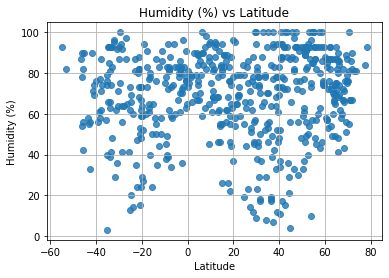

In [22]:
humaxis = cities_df["Humidity"]
plt.scatter(xaxis, humaxis, alpha=0.8)
plt.title("Humidity (%) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
humvslatplot = plt.savefig("../Images/LatvsHum")
plt.show()

In [ ]:
# The above plot shows the humidity in relation to distance from equator. As the Latitude moves closer
# to the Equator, the humidity decreases. Appears to relatively equal in both Northern and Southern Hemispheres.

## Latitude vs. Cloudiness Plot

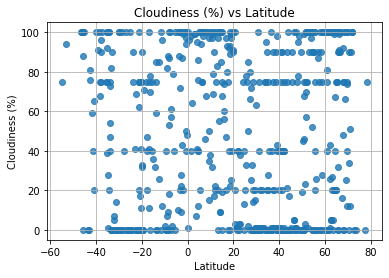

In [23]:
cloudaxis = cities_df["Cloudiness"]
plt.scatter(xaxis, cloudaxis, alpha=0.8)
plt.title("Cloudiness (%) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
clouds = plt.savefig("../Images/LatvsClouds")
plt.show()

In [ ]:
# The above plot shows relative cloudiness in relation to distance from equator. No real trends shown here.

## Latitude vs. Wind Speed Plot

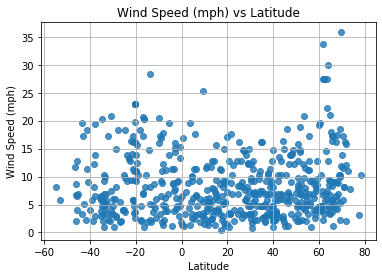

In [24]:
windaxis = cities_df["Wind Speed"]
plt.scatter(xaxis, windaxis, alpha=0.8)
plt.title("Wind Speed (mph) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
wisp = plt.savefig("../Images/LatvsWs")
plt.show()

In [ ]:
# The above plot shows the movement in temperature in relation to distance from equator. Cities North of the
# Equator, have more cities with higher wind velocity.

## Linear Regression

In [25]:
# OPTIONAL: Create a function to create Linear Regression plots

In [26]:
# Create Northern and Southern Hemisphere DataFrames
north_df = cities_df.loc[cities_df["Latitude"] > 0, ['City',
                          'Latitude',
                          'Temperature',
                          'Humidity',
                          'Cloudiness',
                          'Wind Speed'
                                                 ]]
north_df

,City,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
1,Numata,36.63,80.01,84,100,1.99
4,Porto-Novo,6.50,76.82,84,100,6.46
6,Santa,17.49,86.40,68,75,6.44
8,Andros Town,24.70,84.20,79,40,6.93
10,Torbay,47.67,60.44,93,75,13.87
...,...,...,...,...,...,...
554,Rincon,32.30,77.29,88,1,5.82
558,Bagn,60.82,48.87,85,81,4.00
560,Miraflores,19.22,62.29,63,40,9.17
561,Sulangan,11.14,85.46,68,100,3.85


In [27]:
# Create Northern and Southern Hemisphere DataFrames
south_df = cities_df.loc[cities_df["Latitude"] < 0, ['City',
                          'Latitude',
                          'Temperature',
                          'Humidity',
                          'Cloudiness',
                          'Wind Speed'
                                                 ]]
south_df

,City,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Mataura,-46.19,50.13,78,100,2.10
2,Ushuaia,-54.80,37.40,93,75,8.05
3,Bredasdorp,-34.53,50.00,93,20,3.36
5,Atuona,-9.80,77.97,75,2,20.42
7,Port Alfred,-33.59,70.16,41,0,9.91
...,...,...,...,...,...,...
549,Port Hedland,-20.32,89.60,24,11,16.11
555,Boende,-0.22,81.86,65,48,1.81
556,Aliwal North,-30.69,66.04,36,0,7.40
557,Gold Coast,-28.00,72.18,64,40,18.34


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

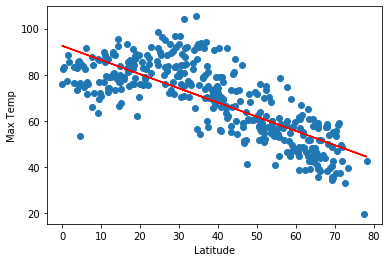

<Figure size 432x288 with 0 Axes>

In [28]:
x_values = north_df['Latitude']
y_values = north_df['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
max1n = plt.savefig("../Images/NorthMax")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

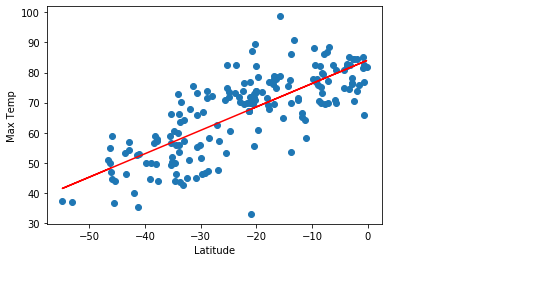

<Figure size 432x288 with 0 Axes>

In [29]:
x_values = south_df['Latitude']
y_values = south_df['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
max1s = plt.savefig("../Images/SouthMax")

In [ ]:
# The two hemispheres shown on these polts show the same information. The closer to the Equator, the higher the teperature. There are  outliers on bothe sides.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

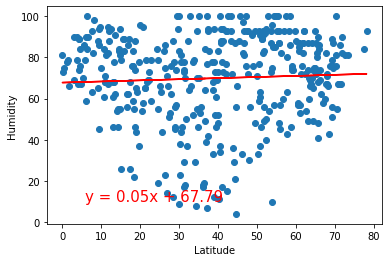

<Figure size 432x288 with 0 Axes>

In [30]:
x_values = north_df['Latitude']
y_values = north_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
humnorth = plt.savefig("../Images/HumNorth")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

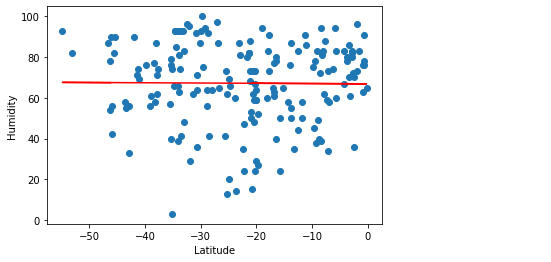

<Figure size 432x288 with 0 Axes>

In [31]:
x_values = south_df['Latitude']
y_values = south_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
humsouth = plt.savefig("../Images/HumSouth")

In [ ]:
#Neither model has much slope. The Norther Hemisphere shows a higher density of cities over 60% humidity

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

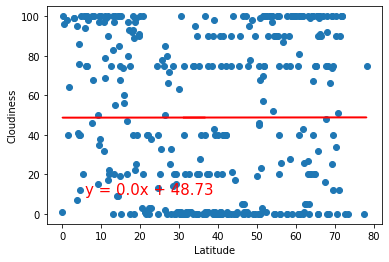

<Figure size 432x288 with 0 Axes>

In [32]:
x_values = north_df['Latitude']
y_values = north_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
norclo = plt.savefig("../Images/NCloud")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

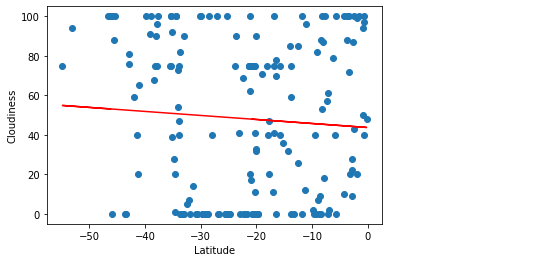

<Figure size 432x288 with 0 Axes>

In [33]:
x_values = south_df['Latitude']
y_values = south_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
souclo = plt.savefig("../Images/SCloud")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

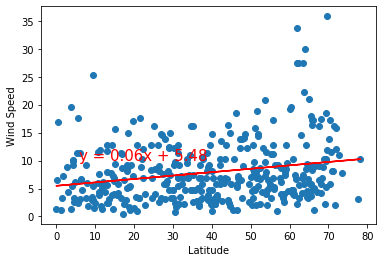

<Figure size 432x288 with 0 Axes>

In [34]:
x_values = north_df['Latitude']
y_values = north_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
nwisp = plt.savefig("../Images/Nwisp")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

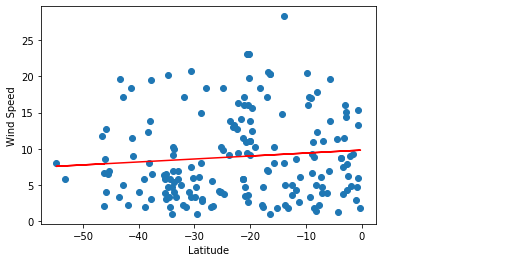

<Figure size 432x288 with 0 Axes>

In [35]:
x_values = south_df['Latitude']
y_values = south_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
wisps = plt.savefig("../Images/Swisp")

In [ ]:
#Very little slope on the Wind speed model as well, still ternding North. 